# Visualization Preparation
The main page includes at least two visualizations using data from the SQLite database.
### 1. Import libraries and load dataset.
- Import Python libraries
- Load `Disaster_Response.db` 

In [32]:
#imports
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


# load data
engine = create_engine('sqlite:///workspace/data/DisasterResponse.db')
df = pd.read_sql_table('Messages_cleaned', engine)

### 2. Create Datasets to plot
- Distribution of messages per category
- Average length of messages per category

In [33]:
#Getting the distribution of messages per category

categories = df.drop(columns=['id','message','original','genre'])
df_count_cat = categories.sum(axis=0)
categories_name = df_count_cat.index.to_list()
categories_count = df_count_cat.values

#Average length of messages per category
df['message_len'] = df['message'].astype(str).map(len)
avg_med_help = df.loc[df['medical_help'] == 1, 'message_len'].sum() / df.loc[df['medical_help'] == 1,'id'].count()
print(avg_med_help)

245.78406909788868


In [34]:
categories_avg_len = []
for col in categories_name:
    avg = df.loc[df[col] == 1, 'message_len'].sum() / df.loc[df[col] == 1,'id'].count()
    categories_avg_len.append(avg)

C:\Users\A55964\AppData\Local\Temp\ipykernel_17968\384009166.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  avg = df.loc[df[col] == 1, 'message_len'].sum() / df.loc[df[col] == 1,'id'].count()


### 3. Plot Data
- Distribution of messages per category
- Average length of messages per category

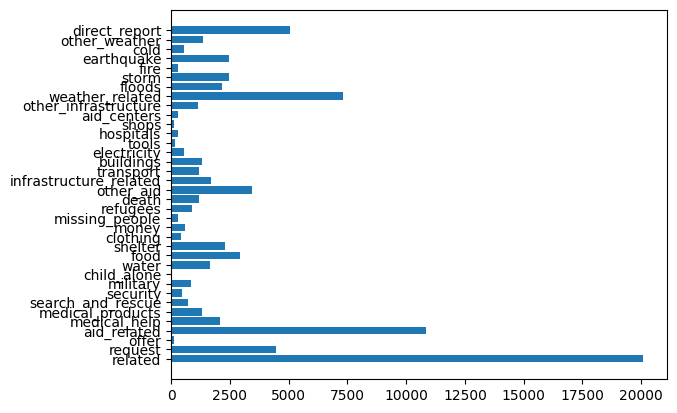

In [36]:
plt.barh(categories_name,categories_count)
plt.show()

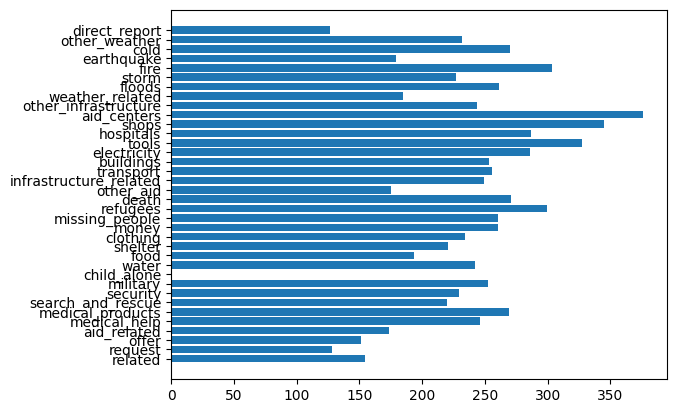

In [35]:
plt.barh(categories_name,categories_avg_len)
plt.show()